Setup for packages and loading the data.

The dataset is a csv file, for each named file there's 24 columns: a label which can be 1 or 2 (1 for SSP, 2 for star) and 23 colour index. 

The data was queried from J-PLUS DR1 database and tidied up to remove duplicates and rows with null values for magnitudes. Then magnitudes were converted to colour index with rSDSS as reference, and objects with probability of being star less than 1. were dropped. This objects were classified as label 2. Additional data was acquired via magnitude convolution for SSPs and classified as label 1.

The notebook renames each label SSP (1) or star (2) for running the algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import graphviz

%matplotlib inline

sns.set_theme()

fname = "./catalog/fulldata.csv"
jplusColours = pd.read_csv(fname, index_col='id')

jplusColours.label.replace([1, 2], ["ssp","star"], inplace=True)

Splitting the data into a X[n_size,n_features] dataframe and y[n_size] label dataframe. Then, each is sampled into two sets for training and splitting, with a test sample of 0.4.

In [2]:
features = list(jplusColours.columns[1:])
print("Feature list: ", features)

X = jplusColours[features]
y = jplusColours["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

Feature list:  ['FUV-r', 'NUV-r', 'u-r', 'J378-r', 'J395-r', 'J410-r', 'J430-r', 'g-r', 'J515-r', 'bp-r', 'r-J660', 'r-G', 'r-i', 'r-rp', 'r-J861', 'r-z', 'r-J', 'r-H', 'r-Ks', 'r-W1', 'r-W2', 'r-W3', 'r-W4']


Running the tree algorithm.

1.0
1.0000 accuracy with a standard deviation of 0.0000


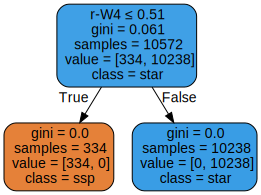

In [3]:
dt = tree.DecisionTreeClassifier()
dtFit = dt.fit(X_train,y_train)
print(dt.score(X_test, y_test))
scores = cross_val_score(dt, X_test, y_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
dot_data = tree.export_graphviz(dtFit, out_file=None,
                               feature_names=features,
                               class_names=["ssp", "star"],
                               filled=True, rounded=True,
                               special_characters=True)
graphviz.Source(dot_data)

Now running sampling the size of features as sqrt(n_features).

0.9997162718116045
0.9994 accuracy with a standard deviation of 0.0008


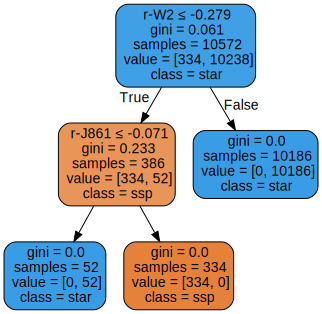

In [4]:
dt2 = tree.DecisionTreeClassifier(max_features = "auto")
dtFit2 = dt2.fit(X_train,y_train)
print(dt2.score(X_test, y_test))
scores = cross_val_score(dt2, X_test, y_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
dot_data = tree.export_graphviz(dtFit2, out_file=None,
                               feature_names=features,
                               class_names=["ssp", "star"],
                               filled=True, rounded=True,
                               special_characters=True)
graphviz.Source(dot_data)

Choosing different samples. First feature sample is only JPLUS colours.

0.9927649311959144
0.9872 accuracy with a standard deviation of 0.0017


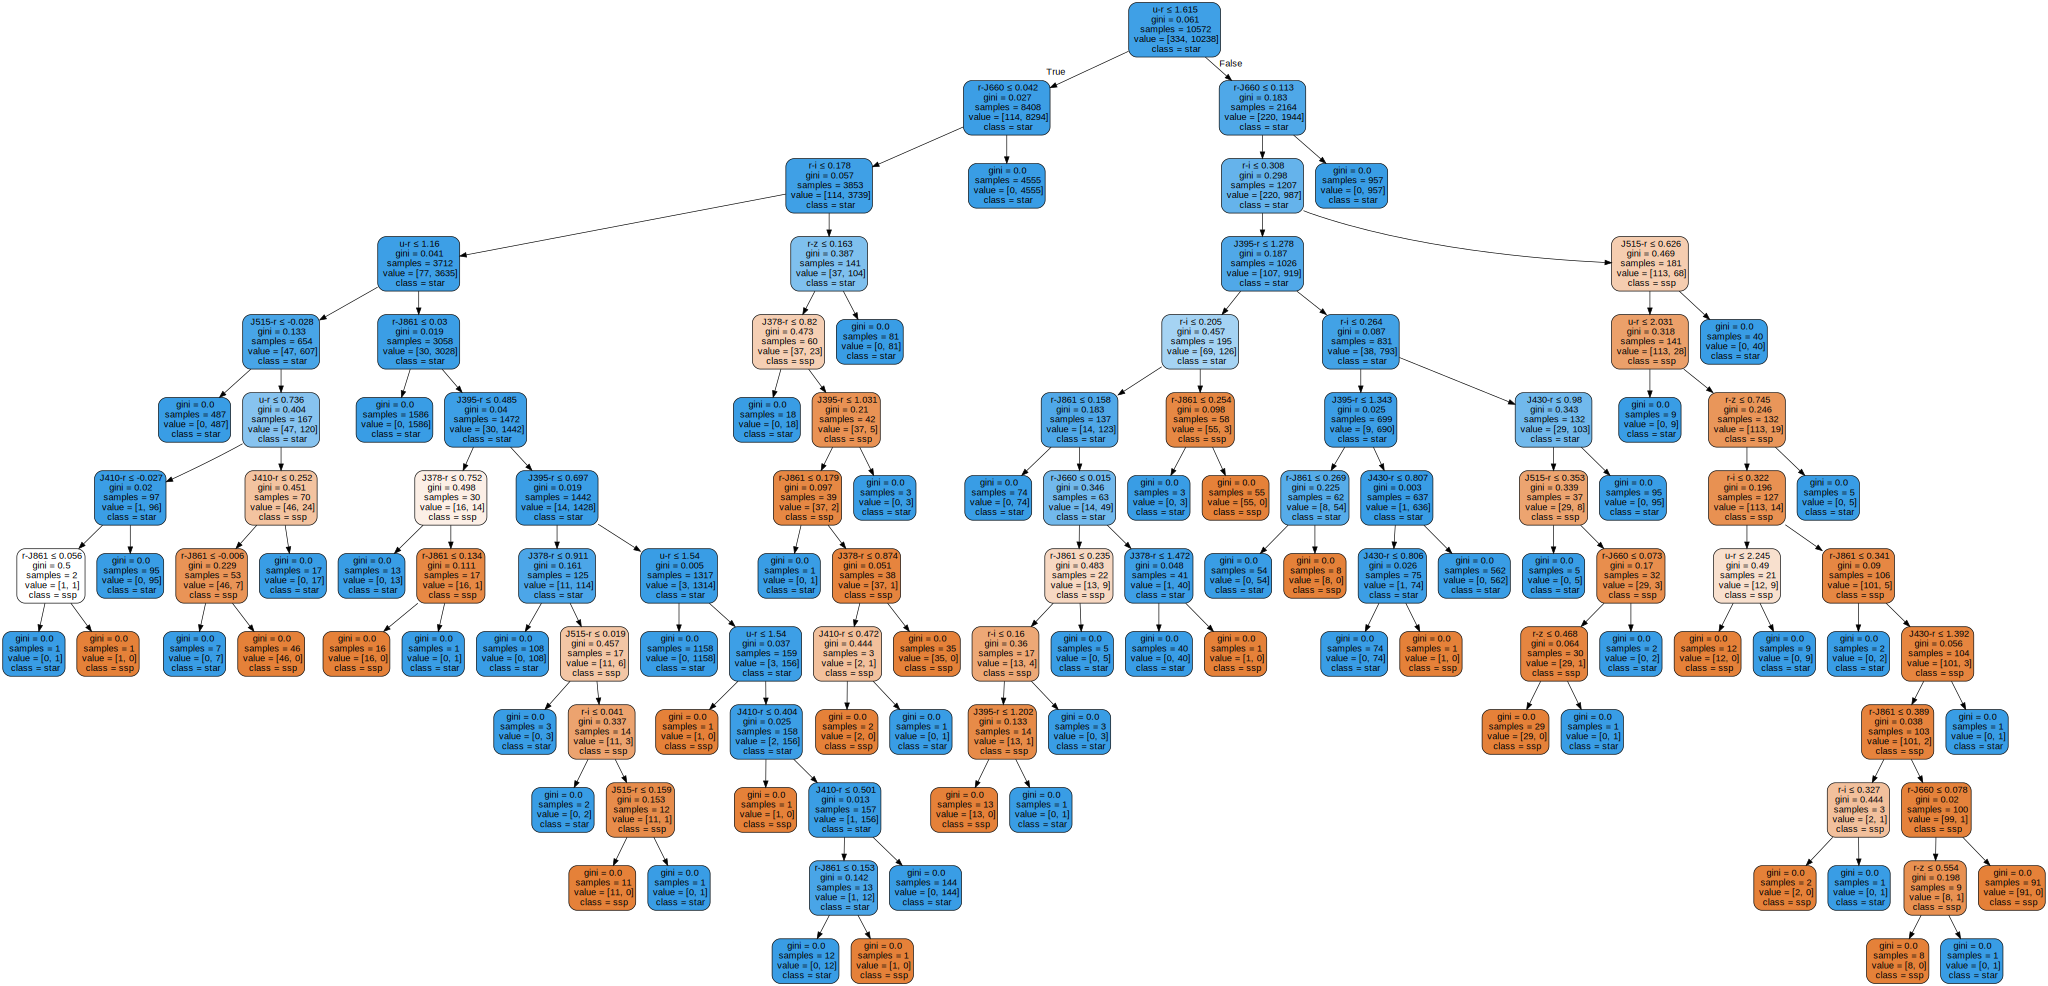

In [5]:
features = ['u-r', 'J378-r', 'J395-r', 'J410-r', 'J430-r', 'g-r', 'J515-r', 'r-J660', 'r-i', 'r-J861', 'r-z']

X = jplusColours[features]
y = jplusColours["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

dt2 = tree.DecisionTreeClassifier()
dtFit2 = dt2.fit(X_train,y_train)
print(dt2.score(X_test, y_test))
scores = cross_val_score(dt2, X_test, y_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
dot_data = tree.export_graphviz(dtFit2, out_file=None,
                               feature_names=features,
                               class_names=["ssp", "star"],
                               filled=True, rounded=True,
                               special_characters=True)
graphviz.Source(dot_data)

Now running the tree with JPLUS+2MASS colours as features.

0.9991488154348135
0.9991 accuracy with a standard deviation of 0.0005


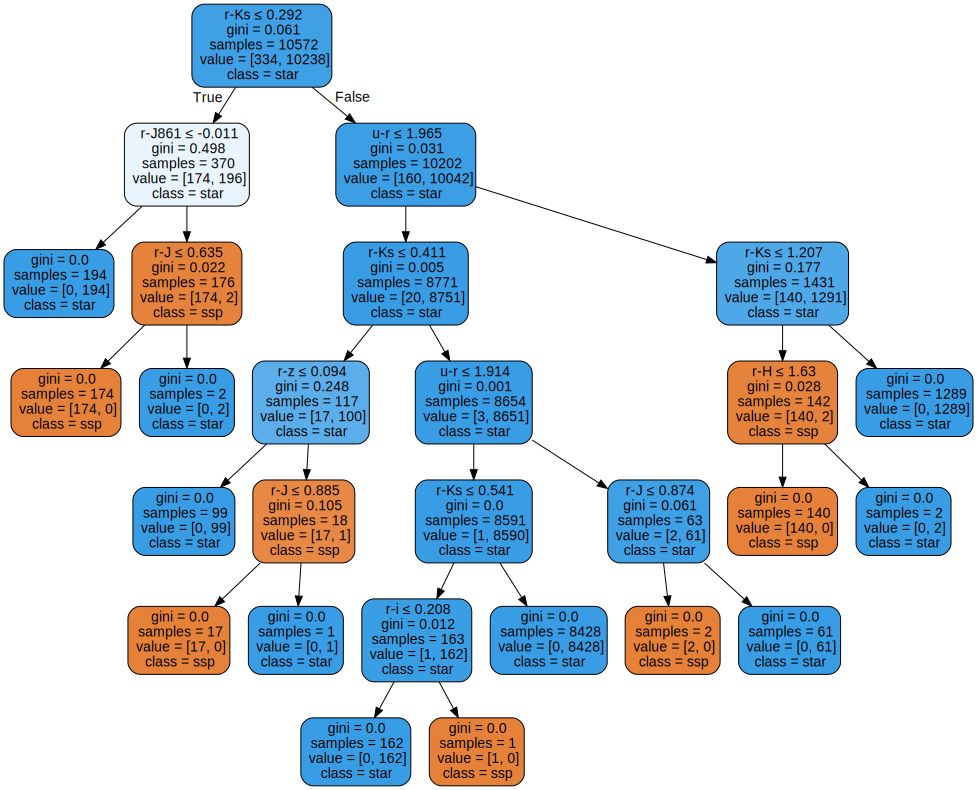

In [6]:
features = ['u-r', 'J378-r', 'J395-r', 'J410-r', 'J430-r', 'g-r', 'J515-r', 'r-J660', 'r-i', 'r-J861', 'r-z', 'r-J', 'r-H', 'r-Ks']

X = jplusColours[features]
y = jplusColours["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

dt2 = tree.DecisionTreeClassifier()
dtFit2 = dt2.fit(X_train,y_train)
print(dt2.score(X_test, y_test))
scores = cross_val_score(dt2, X_test, y_test, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
dot_data = tree.export_graphviz(dtFit2, out_file=None,
                               feature_names=features,
                               class_names=["ssp", "star"],
                               filled=True, rounded=True,
                               special_characters=True)
graphviz.Source(dot_data)

Plotting

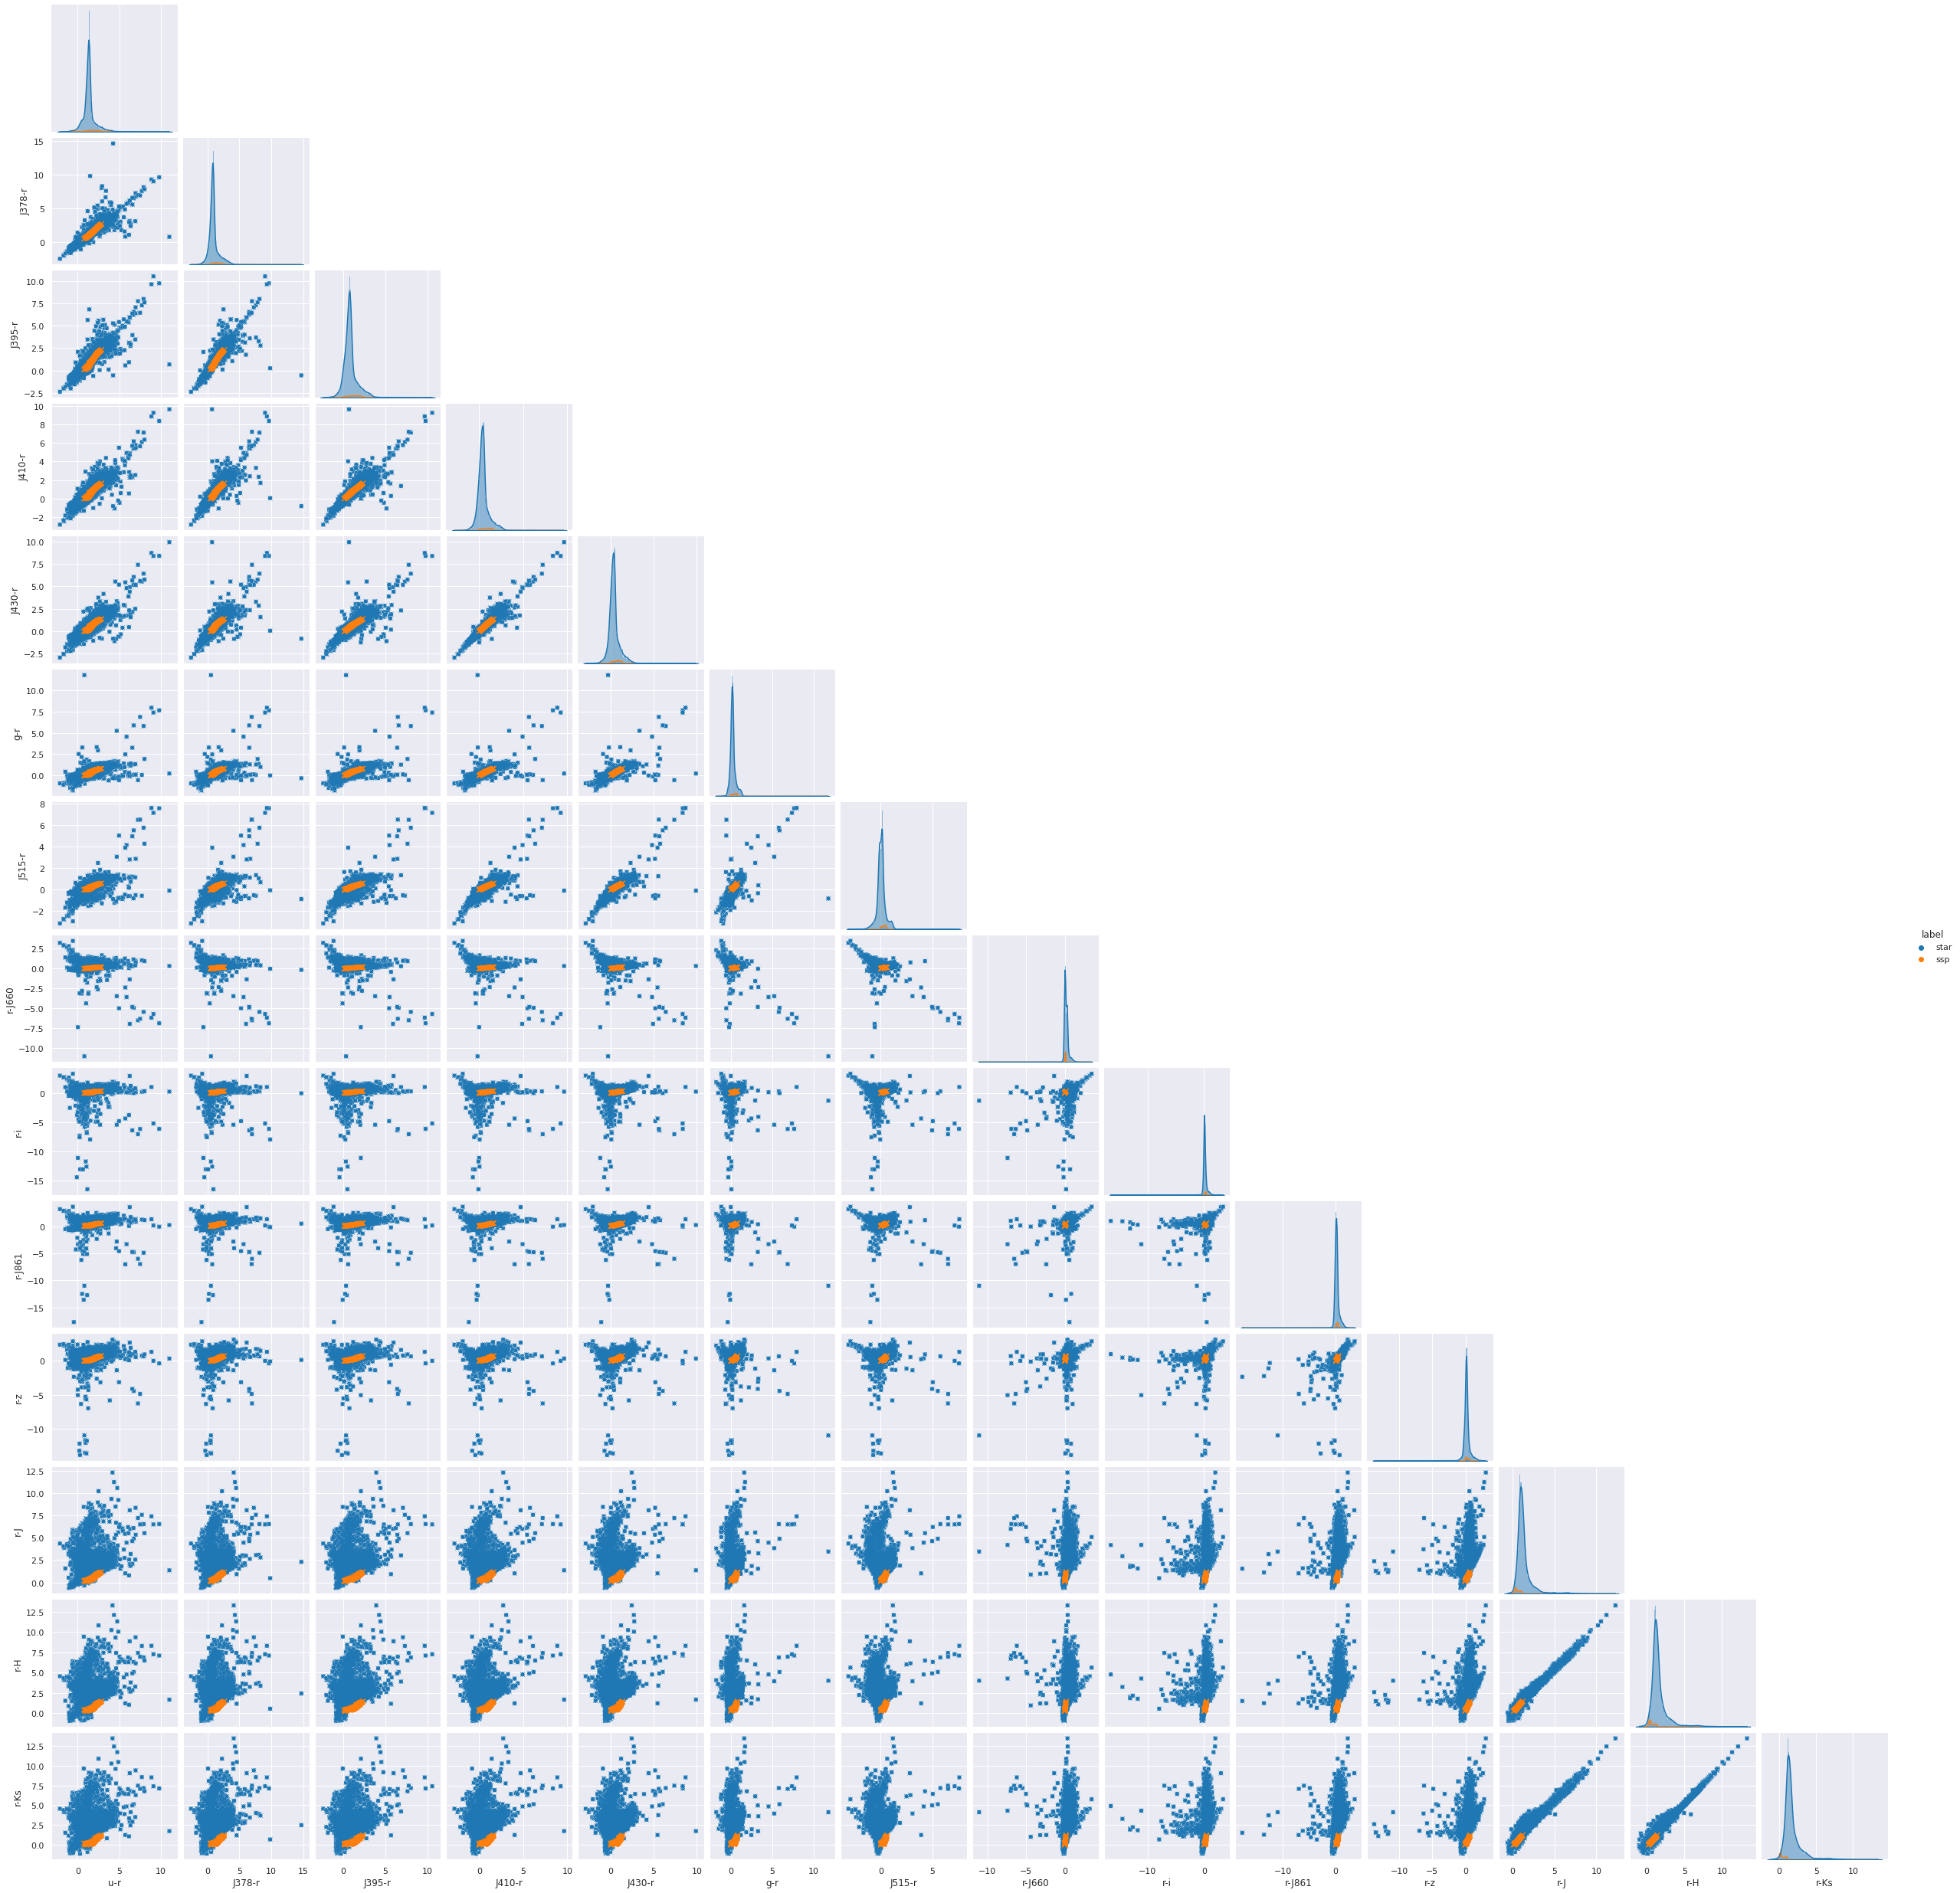

In [10]:
#sns.displot(data=jplusColours, x = 'u-r', hue="label", kind="kde", fill=True)

g = sns.pairplot(
    data = jplusColours,
    x_vars=features,
    y_vars=features,
    hue="label", palette="tab10", 
    corner=True)
g.map_lower(sns.scatterplot, marker="x")
g.map_diag(sns.histplot, kde=True)

In [ ]:
sns.relplot(
    data=jplusColours,
    x="g-r", y="u-r", hue="label",
    palette="tab10", marker="x"
)
sns.relplot(
    data=jplusColours,
    x="g-r", y="r-i", hue="label",
    palette="tab10", marker="x"
)
sns.displot(
    data=jplusColours,
    x="g-r",hue="label",
    palette="tab10", kde=True
)

In [ ]:
subdata =['FUV-r', 'u-r', 'g-r', 'r-G','r-i', 'r-H', 'r-W3', 'r-W4']

g = sns.pairplot(
    data = jplusColours,
    x_vars=subdata,
    y_vars=subdata,
    hue="label", palette="tab10", 
    corner=True)
g.map_lower(sns.scatterplot, marker="x")
#g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_diag(sns.histplot, kde=True)